# Introduction to Regression with Neural Networks in TensorFlow

A regression problem is predicting a numerical variable based on some other combination of variables.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2023-05-30 16:54:15.008818: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-30 16:54:15.055098: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-30 16:54:15.667582: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.12.0


## Creating data to view and fit

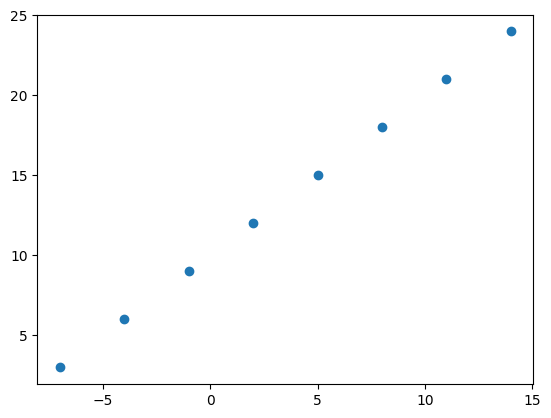

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output Shapes

In [4]:
# Create a demo tensor for housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

2023-05-30 16:54:16.904875: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-30 16:54:16.969167: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-30 16:54:16.969209: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-30 16:54:16.972025: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-30 16:54:16.972070: I tensorflow/compile

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [6]:
# Turn NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), tf.float32)
y = tf.cast(tf.constant(y), tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

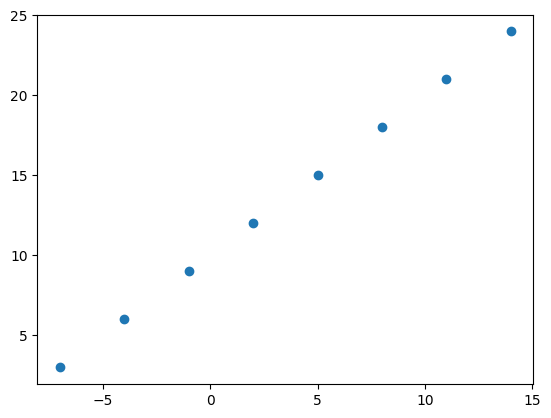

In [8]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and outpu layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells the model how wrong it is) and the optimizer (tells the model how to improve the patterns its learning) and evaluation metrics (what can be used to interpret the performance of the model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [9]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # Remember to place the input shape
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5) 


Epoch 1/5


2023-05-30 16:54:21.147832: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7efc7802beb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-30 16:54:21.147868: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-05-30 16:54:21.304792: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


1/1 [==============================] - 3s 3s/step - loss: 12.7076 - mae: 12.7076
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 12.5751 - mae: 12.5751
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 12.4426 - mae: 12.4426
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 12.3101 - mae: 12.3101
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 12.1776 - mae: 12.1776


2023-05-30 16:54:21.436547: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-30 16:54:21.500779: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [10]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
# Try and make a prediction using the model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 53ms/step


array([[6.8737416]], dtype=float32)

In [12]:
y_pred + 11

array([[17.873741]], dtype=float32)

### Improving the model

1. **Creating a model** - Add more layers, increase the number of hidden units (also called neurons) within each hidden layers, change the activation funciotn of each layer.
2. **Compiling a model** - Change the optimization funciton or perhaps the **learning rate** of the opitimization function.
3. **Fitting a model** - Fit a model for more **epochs**  or on more data

In [13]:
# Rebuild the model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]),
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), 
              metrics=["mae"])

# 3. Fit the model (train longer)
model.fit(X, y, epochs=100) 

Epoch 1/100
1/1 [==============================] - 0s 198ms/step - loss: 14.5826 - mae: 14.5826
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 14.4501 - mae: 14.4501
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 14.3176 - mae: 14.3176
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 14.1851 - mae: 14.1851
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 14.0526 - mae: 14.0526
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 13.9201 - mae: 13.9201
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 13.7876 - mae: 13.7876
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 13.6551 - mae: 13.6551
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 13.5226 - mae: 13.5226
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 13.3901 - mae: 13.3901
Epoch 11/100
1/1 [==============================] - 0s 5m

In [14]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Check if model prediction improved
model.predict([17.0])

1/1 [==============================] - 0s 45ms/step


array([[29.54909]], dtype=float32)

In [16]:
# Rebuild the model

# 1. Create the model (add extra layer)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[1]),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model (adjust optimizer learning rate)
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # important for neural network improvement 
              metrics=["mae"])

# 3. Fit the model (train longer)
model.fit(X, y, epochs=100) 

Epoch 1/100


2023-05-30 16:54:23.246699: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-05-30 16:54:23.253361: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


1/1 [==============================] - 1s 616ms/step - loss: 14.6861 - mae: 14.6861
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 14.0227 - mae: 14.0227
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 13.3663 - mae: 13.3663
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 12.7144 - mae: 12.7144
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 12.0646 - mae: 12.0646
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 11.4140 - mae: 11.4140
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.7596 - mae: 10.7596
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0986 - mae: 10.0986
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 9.4283 - mae: 9.4283
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 8.7459 - mae: 8.7459
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 8

In [17]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
# Predict
model.predict([17.0])

1/1 [==============================] - 0s 39ms/step


array([[26.545353]], dtype=float32)

## Evaluating a model

In practice, a typical workflow when building neural networks is:

Build a model -> fit it -> evaluate it -> tweak the model -> fit it -> evaluate it -> tweak the model -> ...

When evaluating the model, it is good practice to visualize:
* The data
* The model
* The predictions of the model

In [19]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [20]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

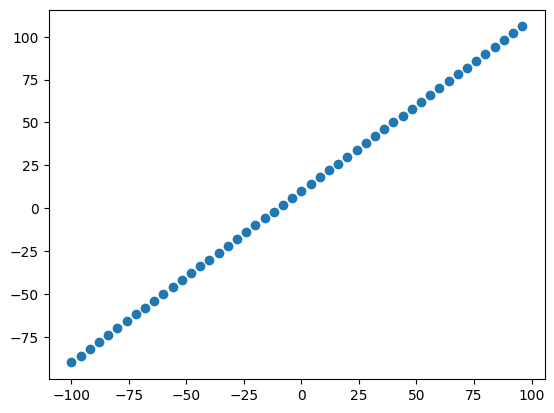

In [21]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets

* **Training set** - the model learns from this data, which is typically 70-80% of the total dataset
* **Validation set** - the model gets tuned on this data, which is 10-15% of the total dataset
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total dataset

In [22]:
# Check the length of how the samples
len(X)

50

In [23]:
# Split the data into train and test sets
X_train = X[:40] # first 40 samples for training
y_train = y[:40]
X_test = X[40:] # last 10 samples for testing
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

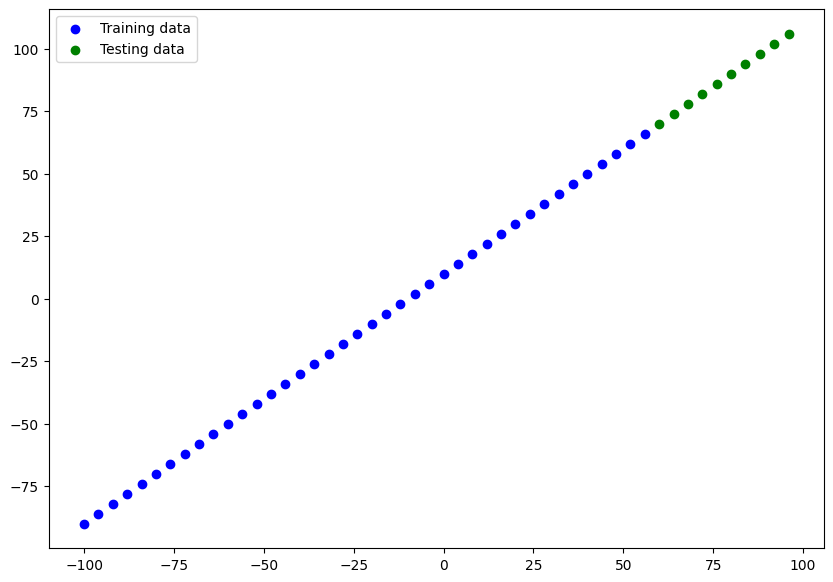

In [24]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
#Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show legend
plt.legend()

In [25]:
# How to build a neural network for the above data
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="Model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X_train, y_train, epochs=100, verbose=0)

In [26]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - the total number of parameters in the model
* Trainable params - these are the parameters (patterns) the model can update as it trains
* Non-trainable params - these parameters aren't updated during training (typical use for reinforcement learning when bringing trained parameters from other models)

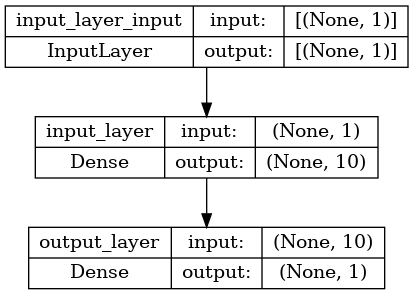

In [27]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True, to_file='models/model_test_plot.png')

### Visualizing model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels

Often seen in the form of `y_test` versus `y_pred`

In [28]:
# Make some predictions
y_pred = model.predict([X_test])
y_pred

1/1 [==============================] - 0s 29ms/step


array([[ 70.36146 ],
       [ 74.93859 ],
       [ 79.51572 ],
       [ 84.09285 ],
       [ 88.66998 ],
       [ 93.247116],
       [ 97.82425 ],
       [102.40137 ],
       [106.9785  ],
       [111.55563 ]], dtype=float32)

In [29]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

Create a Python function when there is a reusable functionality

In [30]:
# Create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    Plots training data, test data, and compare predictions to ground truth labels
    """

    plt.figure(figsize=(10,7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend(); 

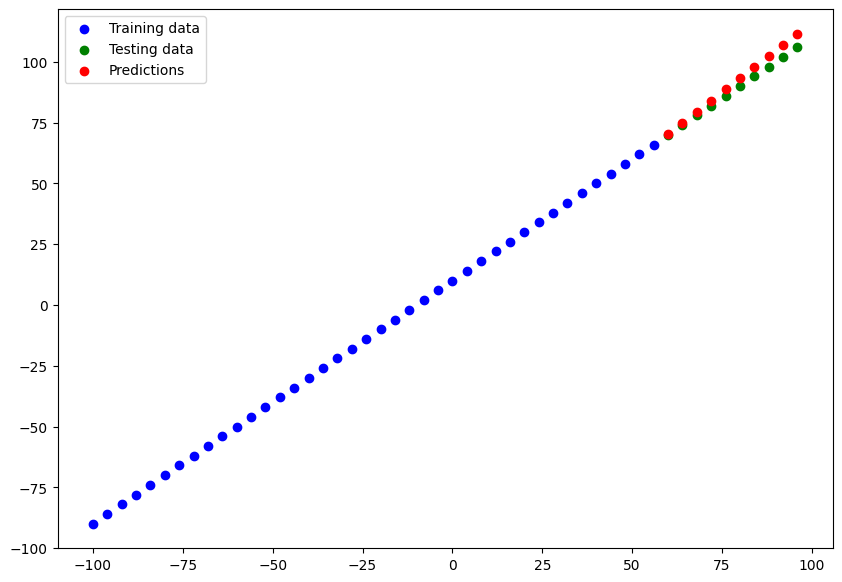

In [31]:
plot_predictions()

### Evaluating model's predictions with regression evaluation metrics

Depending on the problem, there will be different evaluation metrics to evaluate model's performance.

Regression 2 main metrics:
* MAE - mean absolute error, how wrong is each of model's predictions
* MSE - mean square error, square the average errors

In [32]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 74ms/step - loss: 2.9585 - mae: 2.9585


[2.9585464000701904, 2.9585464000701904]

In [33]:
# Calculate the mean absolute error 
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=tf.squeeze(y_pred)) # remove extra dimension with squeeze()
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.9585464>

In [34]:
# Calcullate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test, 
                                     y_pred=tf.squeeze(y_pred)) # remove extra dimension with squeeze()
mse

<tf.Tensor: shape=(), dtype=float32, numpy=11.500903>

In [35]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,
                                          y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                          y_pred=tf.squeeze(y_pred))

### Running experiments to improve model

Build a model -> fit it -> evaluate it -> tweak model -> fit it -> evaluate it -> tweak model -> ...

1. Get more data - get more examples for model to train on (more opportunites to learn patterns or relationships between features and labels)
2. Make model larger (using more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give the model more chances to find patterns in the data

Do 3 modelling experiments:
1. `model_1` - same as original model, 1 layer, trained for 100 epochs 
2. `model_2`- 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [36]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 47.2813 - mae: 47.2813
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 15.9154 - mae: 15.9154
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 14.7554 - mae: 14.7554
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 7.9621 - mae: 7.9621
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.2329 - mae: 10.2329
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4894 - mae: 9.4894
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.6213 - mae: 8.6213
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0590 - mae: 9.0590
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.8585 - mae: 18.8585
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1815 - mae: 10.1815
Epoch 11/100
2/2 [==============================] - 0s 9ms/step - l

1/1 [==============================] - 0s 26ms/step


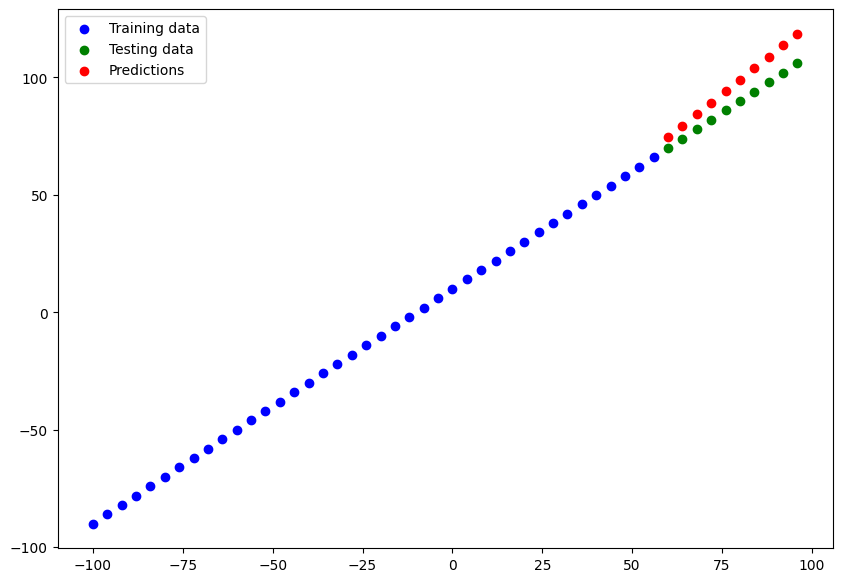

In [37]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test) 
plot_predictions(predictions=y_preds_1)

In [38]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.5968485>,
 <tf.Tensor: shape=(), dtype=float32, numpy=80.404884>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [39]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 26.7058 - mse: 1575.4437
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 24.5698 - mse: 980.6637
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 29.2672 - mse: 1261.4222
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 15.1150 - mse: 367.8800
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 21.7701 - mse: 691.3553
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8996 - mse: 166.9041
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 13.0397 - mse: 237.2389
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2185 - mse: 165.5720
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 41.5497 - mse: 2740.3318
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 28.8072 - mse: 1171.9088
Epoch 11/100
2/2 [===========================

1/1 [==============================] - 0s 30ms/step


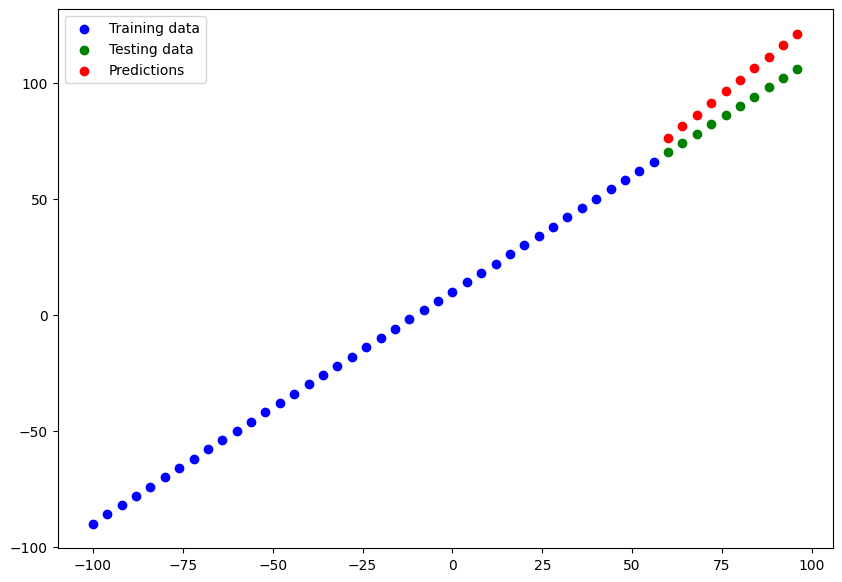

In [40]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [41]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.678512>,
 <tf.Tensor: shape=(), dtype=float32, numpy=121.82658>)

**Build `model_3`**

* 2 layers, train for 500 epochs

In [42]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 68.9001 - mae: 68.9001
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 34.0595 - mae: 34.0595
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 36.7239 - mae: 36.7239
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 18.5902 - mae: 18.5902
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 24.0356 - mae: 24.0356
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.7424 - mae: 11.7424
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 12.9024 - mae: 12.9024
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 11.2336 - mae: 11.2336
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 41.3975 - mae: 41.3975
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 28.6744 - mae: 28.6744
Epoch 11/500
2/2 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 30ms/step


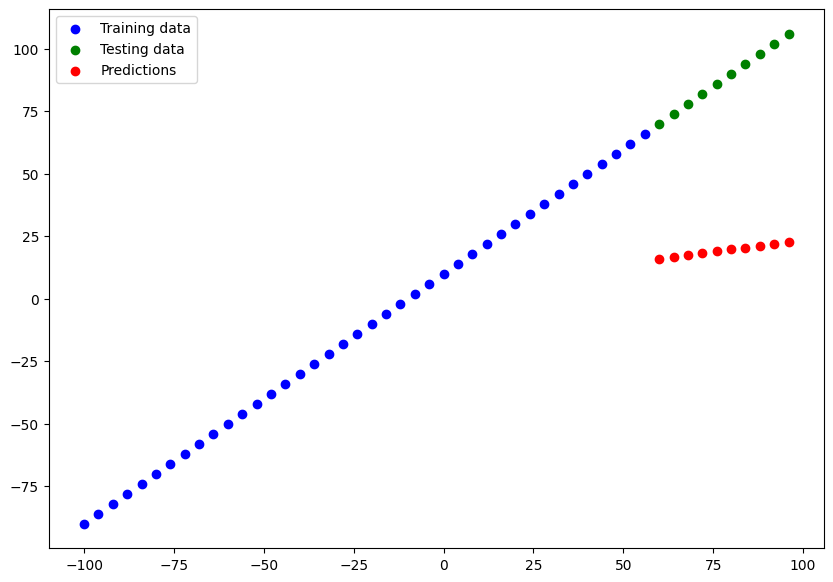

In [43]:
# Make and plot predictions of model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [44]:
# Calculate model_2 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.66362>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4801.013>)

**Note:** Start with a small model first then add complexity when needed

### Comparing the results of experiments

In [45]:
# Create a dataframe and compare model results
import polars as pl

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

all_results = pl.DataFrame(model_results, schema=["model", "mae", "mse"])
all_results

model,mae,mse
str,f64,f64
"""model_1""",8.596848,80.404884
"""model_2""",10.678512,121.826576
"""model_3""",68.66362,4801.013184


In [46]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Note:** One of the main goals should be to minimize the time between experiments. The more experiments, the more things will be figured out.

## Tracking experiments

One really good habit in machine learning modelling is to track the results of experiments.

* TensorBoard - component of the TensorFlow library to help track modelling experiments.
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard)

## Saving Models

Saving models allows them to be used outside of the current environment.

2 main formats for saving model:

1. The SavedModel format
2. The HDF5 format

In [47]:
# Save model with SaveModel format
model_2.save("models/best_model_SaveModel_format")

INFO:tensorflow:Assets written to: models/best_model_SaveModel_format/assets


In [48]:
# Save model with HDF5 format
model_2.save("models/best_model_SaveModel_format.h5")

## Loading a saved model

In [49]:
# Load the SaveModel format model
loaded_SaveModel_format = tf.keras.models.load_model("models/best_model_SaveModel_format")
loaded_SaveModel_format.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Compare model_2 predictions with SaveModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SaveModel_format_preds = loaded_SaveModel_format.predict(X_test)
model_2_preds == loaded_SaveModel_format_preds

1/1 [==============================] - 0s 30ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [51]:
# Load model using .h5 format
loaded_h5_model = tf.keras.models.load_model("models/best_model_SaveModel_format.h5")
loaded_h5_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Compare model_2 predictions with .h5 format model predictions
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 28ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### A larger example

In [53]:
# Import required libraries
import tensorflow as tf
import polars as pl
import matplotlib.pyplot as plt

In [54]:
# Read the insurance dataset
insurance = pl.read_csv("data/insurance.csv")
insurance

age,sex,bmi,children,smoker,region,charges
i64,str,f64,i64,str,str,f64
19,"""female""",27.9,0,"""yes""","""southwest""",16884.924
18,"""male""",33.77,1,"""no""","""southeast""",1725.5523
28,"""male""",33.0,3,"""no""","""southeast""",4449.462
33,"""male""",22.705,0,"""no""","""northwest""",21984.47061
32,"""male""",28.88,0,"""no""","""northwest""",3866.8552
31,"""female""",25.74,0,"""no""","""southeast""",3756.6216
46,"""female""",33.44,1,"""no""","""southeast""",8240.5896
37,"""female""",27.74,3,"""no""","""northwest""",7281.5056
37,"""male""",29.83,2,"""no""","""northeast""",6406.4107


In [55]:
insurance.select("smoker")

smoker
str
"""yes"""
"""no"""
"""no"""
"""no"""
"""no"""
"""no"""
"""no"""
"""no"""
"""no"""


In [56]:
# One-hot encode dataframe to turn categorical variables into numerical
insurance_one_hot = insurance.to_dummies(columns=["smoker","sex","region"])
insurance_one_hot

age,sex_female,sex_male,bmi,children,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
i64,u8,u8,f64,i64,u8,u8,u8,u8,u8,u8,f64
19,1,0,27.9,0,0,1,0,0,0,1,16884.924
18,0,1,33.77,1,1,0,0,0,1,0,1725.5523
28,0,1,33.0,3,1,0,0,0,1,0,4449.462
33,0,1,22.705,0,1,0,0,1,0,0,21984.47061
32,0,1,28.88,0,1,0,0,1,0,0,3866.8552
31,1,0,25.74,0,1,0,0,0,1,0,3756.6216
46,1,0,33.44,1,1,0,0,0,1,0,8240.5896
37,1,0,27.74,3,1,0,0,1,0,0,7281.5056
37,0,1,29.83,2,1,0,1,0,0,0,6406.4107


In [57]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges").to_numpy()
y = insurance_one_hot.select("charges").to_numpy()
X, y

(array([[19.,  1.,  0., ...,  0.,  0.,  1.],
        [18.,  0.,  1., ...,  0.,  1.,  0.],
        [28.,  0.,  1., ...,  0.,  1.,  0.],
        ...,
        [18.,  1.,  0., ...,  0.,  1.,  0.],
        [21.,  1.,  0., ...,  0.,  0.,  1.],
        [61.,  1.,  0., ...,  1.,  0.,  0.]]),
 array([[16884.924 ],
        [ 1725.5523],
        [ 4449.462 ],
        ...,
        [ 1629.8335],
        [ 2007.945 ],
        [29141.3603]]))

In [58]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [59]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss="mae",
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 8664.4678 - mae: 8664.4678
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7852.6250 - mae: 7852.6250
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7597.7544 - mae: 7597.7544
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7737.9629 - mae: 7737.9629
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 7762.1528 - mae: 7762.1528
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7624.7539 - mae: 7624.7539
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7576.0737 - mae: 7576.0737
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7788.0933 - mae: 7788.0933
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7511.5366 - mae: 7511.5366
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7723.1587 - mae: 7723.1587

In [60]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7204.8794 - mae: 7204.8794


[7204.87939453125, 7204.87939453125]

Improve the model

To try improving the model, run 2 experiments:
1. Add an extra layer with more hidden units and change optimizer to Adam
2. Train longer for 200 epochs and same as 1st experiment

In [61]:
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss="mae",
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 13287.1650 - mae: 13287.1650
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13107.1680 - mae: 13107.1680
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 12729.2500 - mae: 12729.2500
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 11985.3867 - mae: 11985.3867
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 10765.0859 - mae: 10765.0859
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 9272.2002 - mae: 9272.2002
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 7991.4785 - mae: 7991.4785
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 7486.1470 - mae: 7486.1470
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7418.7090 - mae: 7418.7090
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 7398.9321 - mae:

In [62]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4799.6602 - mae: 4799.6602


[4799.66015625, 4799.66015625]

In [63]:
tf.random.set_seed(42)

# 1. Create a model (same as above)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss="mae",
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13281.2061 - mae: 13281.2061
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13094.6318 - mae: 13094.6318
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12700.0479 - mae: 12700.0479
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 11939.3301 - mae: 11939.3301
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 10713.2715 - mae: 10713.2715
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9233.3291 - mae: 9233.3291
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 7980.6450 - mae: 7980.6450
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7489.6626 - mae: 7489.6626
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7422.0405 - mae: 7422.0405
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7402.3247 - mae:

In [64]:
# Evaluate the third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3484.0059 - mae: 3484.0059


[3484.005859375, 3484.005859375]

Text(0.5, 0, 'epochs')

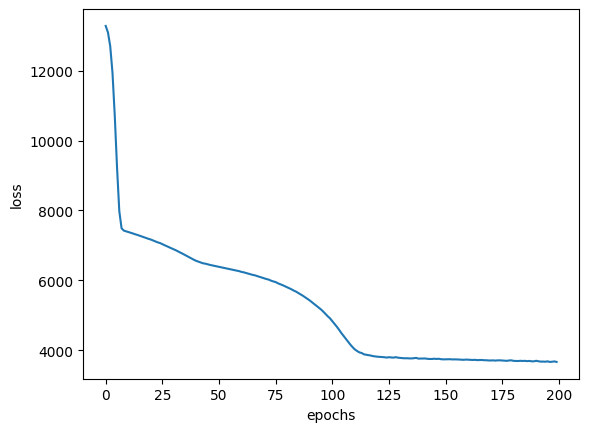

In [65]:
# Plot history (also known as a loss curver or training curve)
plt.plot(pl.DataFrame(history.history).select("loss"))
plt.ylabel("loss")
plt.xlabel("epochs")

Check on [EarlyStoppingCallback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) which is a TensorFlow component that can be added to the model to stop training once it stops improving a certain metric

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

It is possible to try both to see which performs better.

In [69]:
import polars as pl
import matplotlib.pyplot as plt
import tensorflow as tf

# Read the insurance dataframe
insurance = pl.read_csv("data/insurance.csv")
insurance

age,sex,bmi,children,smoker,region,charges
i64,str,f64,i64,str,str,f64
19,"""female""",27.9,0,"""yes""","""southwest""",16884.924
18,"""male""",33.77,1,"""no""","""southeast""",1725.5523
28,"""male""",33.0,3,"""no""","""southeast""",4449.462
33,"""male""",22.705,0,"""no""","""northwest""",21984.47061
32,"""male""",28.88,0,"""no""","""northwest""",3866.8552
31,"""female""",25.74,0,"""no""","""southeast""",3756.6216
46,"""female""",33.44,1,"""no""","""southeast""",8240.5896
37,"""female""",27.74,3,"""no""","""northwest""",7281.5056
37,"""male""",29.83,2,"""no""","""northeast""",6406.4107


(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

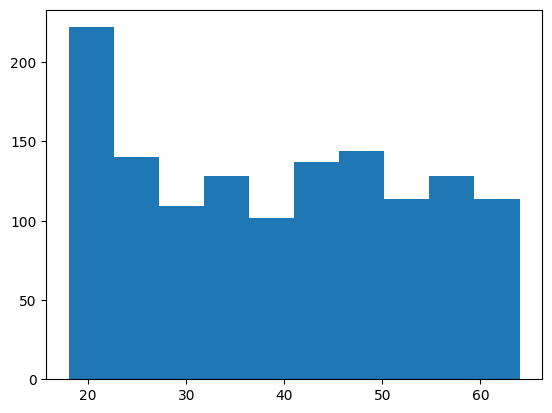

In [70]:
plt.hist(insurance_one_hot.select("age"))

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <BarContainer object of 10 artists>)

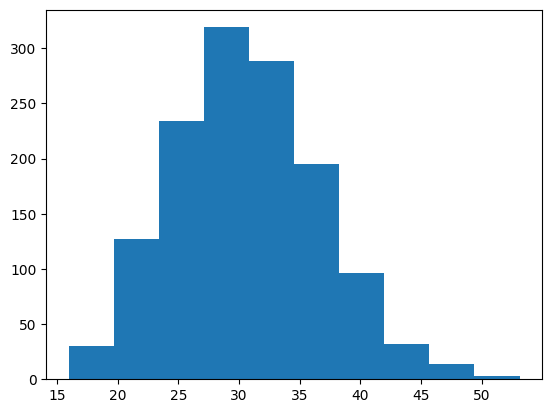

In [71]:
plt.hist(insurance_one_hot.select("bmi"))

To prepare data, borrow some classes from Scikit-Learn.

In [80]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turns values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y
X = insurance.drop("charges").to_pandas()
y = insurance.select("charges").to_pandas()

# Build train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y.to_numpy(), 
                                                    test_size=0.2, 
                                                    random_state=42)

# Fit the column transformer to training data
ct.fit(X_train)

# Transform training and test data with normalization(MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [81]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [82]:
X_train_normal.shape

(1070, 11)

In [86]:
# Build neural network model to fit on normalized data
tf.random.set_seed(42)

# 1. Create a model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13342.8174 - mae: 13342.8174
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13331.5566 - mae: 13331.5566
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13304.9258 - mae: 13304.9258
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13251.9121 - mae: 13251.9121
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13161.1846 - mae: 13161.1846
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 13021.9639 - mae: 13021.9639
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 12824.4365 - mae: 12824.4365
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 12558.7793 - mae: 12558.7793
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 12215.0068 - mae: 12215.0068
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 11793.03

In [84]:
# Evaluate insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3436.5859 - mae: 3436.5859


[3436.5859375, 3436.5859375]